<a href="https://colab.research.google.com/github/EliGorniak/Ocean_DeepLearning_Nov2020/blob/main/Ocean_DeepLearning_nov2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando bibliotecas:
import keras
from keras.datasets import mnist # database de imagens para treino (http://yann.lecun.com/exdb/mnist/)
from tensorflow.python.keras import Sequential # modelo de base da rede neural, uma arquitetura
from tensorflow.python.keras.layers import Dense, Dropout # dense é o neuronio, dropout evita o overfitting (regularizador)
from tensorflow.compat.v1.keras.optimizers import RMSprop # diz pra rede qual é o back propagation

In [2]:
# carregando os dados de treino e teste:
# usando os dados do próprio MNinst
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [3]:
# Analisando o database:
# Quantas imagens temos para treino?
print('Quantidade de imagens para treino:', len(x_treino))

# Quantas imagens temos para teste?
print('Quantidade de imagens para teste:', len(x_teste))

# Qual o tipo de x_treino?
print('Tipo do x_treino', type(x_treino))

# Pegando a primeira imagem
primeira_imagem = x_treino[0]
print(primeira_imagem)
representacao_primeira_imagem = y_treino[0]
print('O que a imagem 0 representa:', representacao_primeira_imagem)

# Qual o formato da primeira imagem?
print('Formato da primeira imagem:', primeira_imagem.shape, type(primeira_imagem.shape))


Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
Tipo do x_treino <class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 2

Essa imagem representa: 9


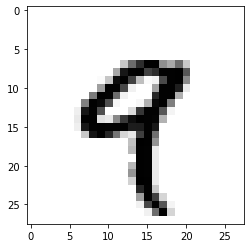

In [4]:
# Exibir as imagens na base de dados:
import matplotlib.pyplot as plt
indice = 4

print('Essa imagem representa:', y_treino[indice])
plt.imshow(x_treino[indice], cmap=plt.cm.binary) #cmap = color map, o mapa de cores
plt.show()

In [5]:
# Achatando as matrizes de pixels e transformando em uma única lista:
quantidade_treino = len(x_treino) # 60000 
quantidade_teste = len(x_teste)# 10000

resolucao_imagem = x_treino[0].shape # (28 pixels X 28 pixels)
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] # 28 * 28 = 784

# re-shape - função para mudar o formato de um array
x_treino = x_treino.reshape(quantidade_treino, resolucao_total) #vai fazer o reshape de x_treino
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [6]:
print('Quantidade de itens em x_treino[0]:', len(x_treino[0]))

# como ficou x_treino[0]?
print(x_treino[0])


Quantidade de itens em x_treino[0]: 784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 25

In [7]:
# Normalização dos dados - transformando todos os dados entre valores 0 e 1:
# 255 vira 1
# 127 vora 0.5
# 0 vira 0
# e assim por diante

# precisamos garantir que o valor máximo de entrada é 1
# https://www.3blue1brown.com/neural-networks 
# Como atualmente a imagem fornece um valor máximo de 255, precisamos normaliza-los dividindo por 255

x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

#transformação de cada um dos elementos para até 1
x_treino /= 255
x_teste /= 255

print(x_treino[0][350], type(x_treino[0][350]))
# NÃO EXECUTAR MAIS DE UMA VEZ!!! OU VAI CONTINUAR DIVIDINDO POR 255....

0.27450982 <class 'numpy.float32'>


In [8]:
# Visualizando os dados agora normalizados
print('DADOS NORMALIZADOS:', x_treino[0])


DADOS NORMALIZADOS: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.

In [9]:
# Preparação da camada de saída (output)

valores_unicos = set(y_treino)
print(valores_unicos)

quantidade_valores_unicos = len(valores_unicos) # comprimento será 10
print(quantidade_valores_unicos)

# Transformar os valores únicos em variáveis categóricas
# Representação categórica de um número na rede neural:
# Número 0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] - se vier um número 0, ele vai assumir o índice 0
# Número 1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# ...
# Número 9 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

print('y_treino[0] antes:', y_treino[0])

y_treino = keras.utils.to_categorical(y_treino, quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quantidade_valores_unicos)

print('y_treino[0] depois:', y_treino[0])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10
y_treino[0] antes: 5
y_treino[0] depois: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
# Criando o modelo de rede neural
model = Sequential()

# Primeira hidden layer:
# 30 neurônios - decidido a partir de uma fórmula de partida
# função de ativação: ReLU
# Como estamos na primeira hidden layer, precisamos informar o formato da camada de entrada (input)

model.add(Dense(30, activation='relu', input_shape=(resolucao_total,)))

# adicionando um regularizador para evitar o overfitting. No caso será o Dropout
model.add(Dropout(0.2))

# Segunda hidden layer:
# 30 neurônios - decidido a partir de uma fórmula de partida
# função de ativação: ReLU
model.add(Dense(20, activation='relu'))

# Mais um regularizador depois da segunda hidden layer
model.add(Dropout(0.2))

# Finalizamos com a camada de saída (output), informando a quantidade de valores únicos, que no caso é 10
model.add(Dense(quantidade_valores_unicos, activation='softmax')) # na ultima camada

# Exige o resumo do modelo criado
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compilando o modelo:

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])


In [13]:
# Treina o modelo:
history = model.fit(x_treino, y_treino,
                    batch_size = 128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_teste, y_teste))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.8438 - accuracy: 0.7327 - val_loss: 0.3009 - val_accuracy: 0.9124
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4597 - accuracy: 0.8597 - val_loss: 0.2403 - val_accuracy: 0.9298
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3935 - accuracy: 0.8826 - val_loss: 0.2138 - val_accuracy: 0.9364
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3600 - accuracy: 0.8943 - val_loss: 0.2013 - val_accuracy: 0.9412
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3348 - accuracy: 0.9018 - val_loss: 0.1865 - val_accuracy: 0.9473
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3194 - accuracy: 0.9071 - val_loss: 0.1802 - val_accuracy: 0.9494
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3086 - accuracy: 0.9107 - val_loss: 0.1739 - val_accuracy: 0.9503
Epoch 

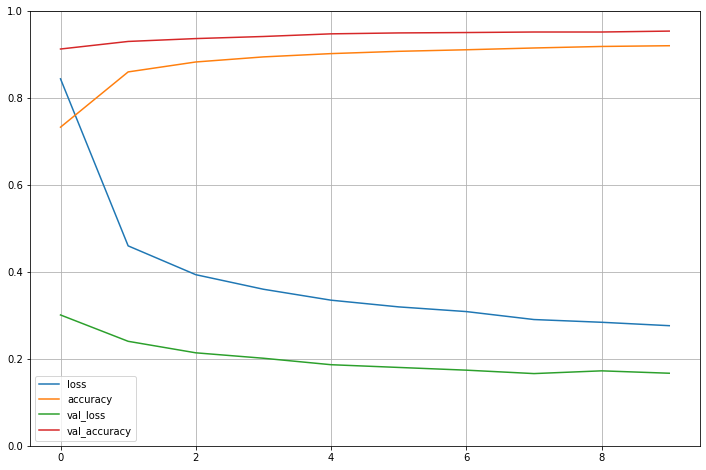

In [15]:
# Visualizando o treino em gráfico:

import pandas as pd

pd.DataFrame(history.history).plot(figsize = (12,8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


Valor categórico em y_teste[indice]: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Previsão: [[6.9315559e-10 7.9190826e-08 4.5143487e-04 9.9951065e-01 1.7031836e-13
  3.1394688e-05 1.1699063e-12 5.5313990e-07 5.8142991e-06 2.5915674e-09]]
Previsão ajustada: [3]


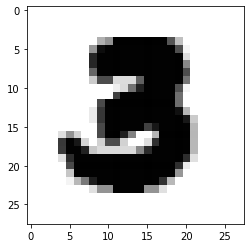

In [20]:
# Fazendo nossas previsões

indice = 200

print("Valor categórico em y_teste[indice]:", y_teste[indice])

# Preparar a imagem para fazer a previsão
imagem = x_teste[indice].reshape((1, resolucao_total))

prediction = model.predict(imagem)
print("Previsão:", prediction)

# Transformar a previsão em algo que conseguimos entender

import numpy as np
prediction_class = np.argmax(model.predict(imagem), axis=-1)
print("Previsão ajustada:", prediction_class)

# Apenas para visualizar a imagem
(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)

